In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from function import Network

from sklearn import datasets
# 加载波士顿房价的数据集
boston = datasets.load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.

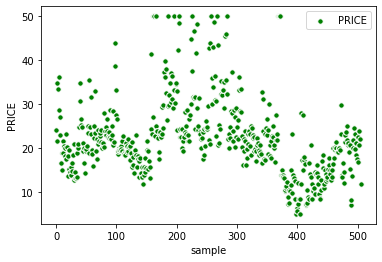

In [2]:
# 将数据转为dataframe的格式
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
print(boston_df)

L1 = plt.scatter(range(boston.data.shape[0]),boston_df['PRICE'], c='g', s=30, edgecolor='white')
# plt.title('y_test_PRICE')
plt.xlabel('sample')
plt.ylabel('PRICE')
legend = plt.legend([L1], ['PRICE'])
plt.show()

In [3]:
# 查看数据的描述信息，在描述信息里可以看到每个特征的均值，最大值，最小值等信息。
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
# 查看数据是否存在空值，从结果来看数据不存在空值。
boston_df.isnull().sum()
# 查看数据大小
boston_df.shape
# 显示数据前5行
boston_df.head()
# 清洗'PRICE' = 50.0 的数据
boston_df = boston_df.loc[boston_df['PRICE'] != 50.0]
boston_df = boston_df.loc[boston_df['ZN'] != 100]

print(boston_df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.

In [5]:
# 计算每一个特征间的相关系数
boston_df.corr()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.198902,0.407763,-0.064439,0.420153,-0.218772,0.353325,-0.382262,0.627276,0.583533,0.286520,-0.384250,0.461516,-0.449855
ZN,-0.198902,1.000000,-0.524974,-0.052741,-0.511113,0.308604,-0.564702,0.669797,-0.308491,-0.300634,-0.375766,0.175704,-0.419221,0.401433
INDUS,0.407763,-0.524974,1.000000,0.035155,0.764338,-0.411033,0.637050,-0.708812,0.596020,0.717133,0.384737,-0.363044,0.635185,-0.598526
CHAS,-0.064439,-0.052741,0.035155,1.000000,0.085125,0.045466,0.070763,-0.076975,-0.033064,-0.068269,-0.117987,0.041922,-0.007149,0.075583
NOX,0.420153,-0.511113,0.764338,0.085125,1.000000,-0.321158,0.727038,-0.767518,0.611969,0.666693,0.185087,-0.382735,0.611205,-0.522931
RM,-0.218772,0.308604,-0.411033,0.045466,-0.321158,1.000000,-0.267173,0.243301,-0.195045,-0.280791,-0.291411,0.118601,-0.609581,0.686031
AGE,0.353325,-0.564702,0.637050,0.070763,0.727038,-0.267173,1.000000,-0.742935,0.451464,0.498770,0.266166,-0.278517,0.637001,-0.491653
DIS,-0.382262,0.669797,-0.708812,-0.076975,-0.767518,0.243301,-0.742935,1.000000,-0.492034,-0.530994,-0.241476,0.299122,-0.534329,0.365588
RAD,0.627276,-0.308491,0.596020,-0.033064,0.611969,-0.195045,0.451464,-0.492034,1.000000,0.909050,0.455663,-0.451307,0.509823,-0.475862
TAX,0.583533,-0.300634,0.717133,-0.068269,0.666693,-0.280791,0.498770,-0.530994,0.909050,1.000000,0.450840,-0.447919,0.565523,-0.571513


In [6]:
# 计算每一个特征和房价的相关系数
corr = boston_df.corr()
corr = corr['PRICE']
print(corr)

CRIM      -0.449855
ZN         0.401433
INDUS     -0.598526
CHAS       0.075583
NOX       -0.522931
RM         0.686031
AGE       -0.491653
DIS        0.365588
RAD       -0.475862
TAX       -0.571513
PTRATIO   -0.516674
B          0.364549
LSTAT     -0.759045
PRICE      1.000000
Name: PRICE, dtype: float64


<AxesSubplot:>

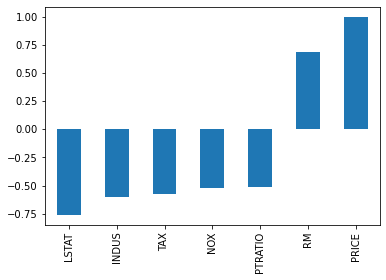

In [7]:
# 图像化相关系数
corr[abs(corr) > 0.5].sort_values().plot.bar()

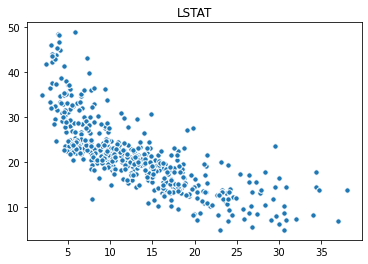

In [8]:
# LSTAT 和房价的散点图
plt.scatter(boston_df['LSTAT'], boston_df['PRICE'], s=30, edgecolor='white')
plt.title('LSTAT')
plt.show()


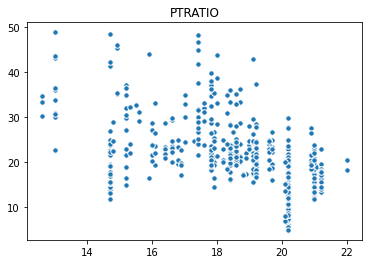

In [9]:
#PTRATIO 和房价的散点图
plt.scatter(boston_df['PTRATIO'], boston_df['PRICE'],s=30, edgecolors='white')
plt.title('PTRATIO')
plt.show()

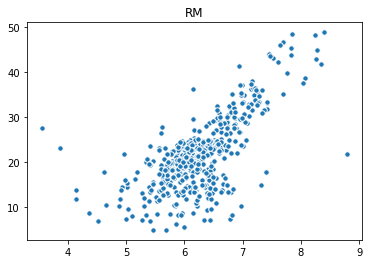

In [10]:
# RM和房价的散点图
plt.scatter(boston_df['RM'], boston_df['PRICE'],s=30, edgecolors='white')
plt.title('RM')
plt.show()

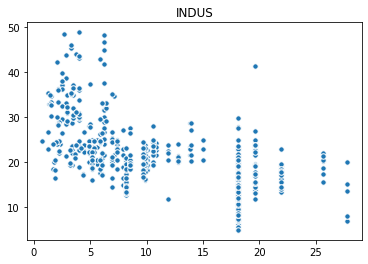

In [11]:
#  INDUS和房价的散点图
plt.scatter(boston_df['INDUS'], boston_df['PRICE'],s=30, edgecolors='white')
plt.title('INDUS')
plt.show()

In [12]:
# 只提取3个相关性高的特征
boston_df = boston_df[['LSTAT', 'PTRATIO', 'RM', 'PRICE']]
# # 目标值
y = np.array(boston_df['PRICE'])
boston_df = boston_df.drop(['PRICE'], axis=1)
# 特征值
X = np.array(boston_df)


In [13]:
# 分割测试集和训练集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(391, 3) (98, 3) (391,) (98,)


In [14]:
# # # 将y转为2维数组
# y_train = y_train.reshape(1,-1)
# y_test = y_test.reshape(1,-1)

In [33]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(391, 3) (98, 3) (391,) (98,)


In [50]:
# %load function.py
#!/usr/bin/env python
# author = 'elder ring$'
# time = 2022/3/30
# Project = function
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


class Network(object):
    def __init__(self, num_weights):
        # 随机初始化权重w
        np.random.seed(0)
        self.w = np.random.randn(1, num_weights)
        self.b = 0

    def linear_forward(self, x):
        z = np.dot(self.w, x.T) + self.b
        return z
    
    def Normalization(self, X):
        maximums, minimums, avgs = X.max(axis=0), X.min(axis=0), \
                                   X.sum(axis=0) / X.shape[0]
        # 对数据进行归一化处理
        for i in range(X.shape[1]):
            # print(maximums[i], minimums[i], avgs[i])
            X[:, i] = (X[:, i] - avgs[i]) / (maximums[i] - minimums[i])

        return X
    
    def cost(self, z, y):
#         num_samples = y.shape[1]
#         cost = (np.square(y-z)).sum()/ (2 * m)
        error = z - y
        num_samples = error.shape[1]
        cost = error * error
        cost = np.sum(cost) / num_samples / 2
        return cost

    def gradient(self, x, y, z):
        m = x.shape[0]
#         dw = 1. / m * np.dot(z-y, x)
        dw = 1. / m * np.sum((z-y).T * x, axis=0)
        db = 1. / m * np.sum(z-y)
        return dw, db

    def updata(self, dw, db, learning_rate=0.01):
        self.w = self.w - learning_rate * dw
        self.b = self.b - learning_rate * db

    def train(self, x, y, num_iterations=3000, learning_rate=0.01):
        m = x.shape[0]
        costs = []
        y = y.reshape(1,-1)
        for i in range(1, num_iterations + 1):
            np.random.shuffle(x)
            z = self.linear_forward(x)
            cost = self.cost(z, y)
            dw, db = self.gradient(x, y, z)
            self.updata(dw,db,learning_rate)
            # 每迭代100次输出一次cost
            if i % 100 == 0:
                print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
            if i % 100 == 0:
                costs.append(cost)

        # 损失函数图像
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        return costs

In [35]:
# #KNN算法

# from sklearn.preprocessing import StandardScaler
# standardscaler = StandardScaler()
# standardscaler.fit(X_train)
# x_train_std = standardscaler.transform(X_train)
# x_test_std = standardscaler.transform(X_test)


In [36]:
# from sklearn.neighbors import KNeighborsRegressor
# KNN_reg = KNeighborsRegressor()
# KNN_reg.fit(x_train_std,y_train)

KNeighborsRegressor()

In [37]:
# y_pred = KNN_reg.predict(x_test_std)
# np.sqrt(mean_squared_error(y_test,y_pred))

8.500157741633567

In [38]:
# from sklearn.metrics import r2_score
# r2_score(y_test,y_pred)

# y_test = y_test.reshape(1,-1)
# y_pred = y_pred.reshape(1,-1)

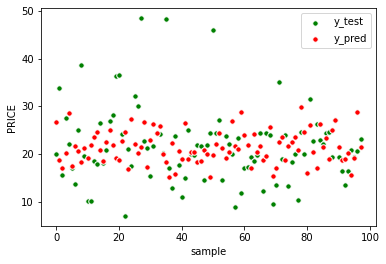

In [39]:
# L1 = plt.scatter(range(y_test.shape[1]),y_test, c='g', s=30, edgecolor='white')
# L2 = plt.scatter(range(y_pred.shape[1]),y_pred, c='r', s=30, edgecolor='white')
# # plt.title('y_test_PRICE')
# plt.xlabel('sample')
# plt.ylabel('PRICE')
# legend = plt.legend([L1,L2], ["y_test","y_pred"])
# plt.show()

Cost after iteration 100: 63.18754585762552
Cost after iteration 200: 35.63842428074075
Cost after iteration 300: 31.769028521668364
Cost after iteration 400: 31.254568304769037
Cost after iteration 500: 31.168899879439056
Cost after iteration 600: 31.184249765336922
Cost after iteration 700: 31.23865197872004
Cost after iteration 800: 31.004768888955137
Cost after iteration 900: 31.129084528622126
Cost after iteration 1000: 31.31835055841651


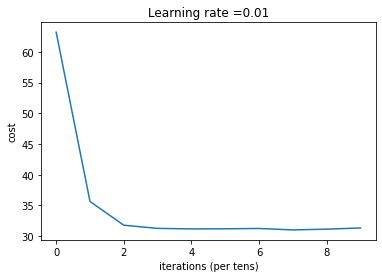

In [51]:
# 线性回归梯度下降法
net = Network(X_train.shape[1])
net.Normalization(X_train)
losses = net.train(X_train, y_train, num_iterations=1000)


In [53]:
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score#R square

net.Normalization(X_test)
y_test_predict = net.linear_forward(X_test)

mse = mean_squared_error(y_test,y_test_predict)#均方差
rmse = np.sqrt(mse)#均方根

r2 = r2_score(np.squeeze(y_test), np.squeeze(y_test_predict))#r2
print('mse = ' + str(mse))
print('rmse = ' + str(rmse))
print("r2 = " + str(r2))


mse = 60.76605124193463
rmse = 7.795258253703635
r2 = -0.028047560867838106


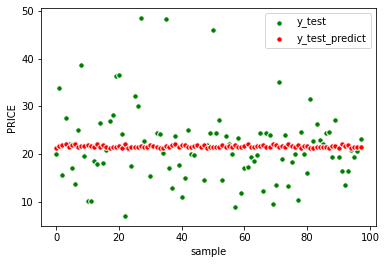

In [52]:
L1 = plt.scatter(range(y_test.shape[1]),y_test, c='g', s=30, edgecolor='white')
L2 = plt.scatter(range(y_test_predict.shape[1]),y_test_predict, c='r', s=30, edgecolor='white')
# plt.title('y_test_PRICE')
plt.xlabel('sample')
plt.ylabel('PRICE')
legend = plt.legend([L1,L2], ["y_test","y_test_predict"])
plt.show()